# 연습문제(2)

# 기술통계 연습문제 (2)

Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋이다.

이 데이터셋은 미국에서 수집된 임금에 대한 정보를 포함하고 있다.

> https://data.hossam.kr/D02/wage.xlsx

| year | age  | maritl           | race     | education       | region             | jobclass       | health         | health_ins | logwage | wage  |
|------|------|------------------|----------|-----------------|--------------------|----------------|----------------|------------|---------|-------|
| 2006 | 18.0 | 1. Never Married | 1. White | 1. < HS Grad    | 2. Middle Atlantic | 1. Industrial  | 1. <=Good      | 2. No      | 4.3     | 75.0  |
| 2004 | 24.0 | 1. Never Married | 1. White | 4. College Grad | 2. Middle Atlantic | 2. Information | 2. >=Very Good | 2. No      | 4.3     | 70.5  |
| 2003 | 45.0 | 2. Married       | 1. White | 3. Some College | 2. Middle Atlantic | 1. Industrial  | 1. <=Good      | 1. Yes     | 4.9     | 131.0 |
| 2003 | 43.0 | 2. Married       | 3. Asian | 4. College Grad | 2. Middle Atlantic | 2. Information | 2. >=Very Good | 1. Yes     | 5.0     | 154.7 |
| 2005 | 50.0 | 4. Divorced      | 1. White | 2. HS Grad      | 2. Middle Atlantic | 2. Information | 1. <=Good      | 1. Yes     | 4.3     | 75.0  |

각 변수는 다음과 같은 의미를 갖는다.

| 변수명 | 의미 |
|--|--|
| year | 조사년도? |
| age | 나이 |
| maritl | 결혼여부 |
| race | 근로자의 인종 |
| education | 교육수준 |
| region | 지역 |
| jobclass | 직군 |
| health | 건강상태 |
| health_ins | 건강보험 가입 여부 |
| logwage | 임금(로그값) |
| wage | 임금 |

In [39]:
import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame, merge, crosstab
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = read_excel("https://data.hossam.kr/D02/wage.xlsx")
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [4]:
df1 = df.rename(
    columns={'year':'탄생년도','age':'나이','maritl':'결혼여부','race':'근로자의인종','education':'교육수준','region':'지역','jobclass':'직군','health':'건강상태',
             'health_ins':'건강보험가입여부','logwage':'임금(로그)','wage':'임금'},
)
df1

,탄생년도,나이,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부,임금(로그),임금
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


1. 데이터를 로드하여 명목형 변수를 `1`, `2` 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.

In [23]:
df1.shape # 데이터 정보(3천행 11열)

(3000, 11)

In [5]:
df1.dtypes # 데이터의 유형 (object가 명목형 변수)

탄생년도          int64
나이            int64
결혼여부         object
근로자의인종       object
교육수준         object
지역           object
직군           object
건강상태         object
건강보험가입여부     object
임금(로그)      float64
임금          float64
dtype: object

In [30]:
# 특정 변수의 데이터 종류 파악하기
vc = df['maritl'].value_counts() # .value_counts() 함수를 사용하면 값의 종류를 한 번에 볼 수 있다. / 값이 많은 순서대로 출력된다. 
vc

maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: count, dtype: int64

In [32]:
vclist = list(vc.index)
vclist

['2. Married', '1. Never Married', '4. Divorced', '5. Separated', '3. Widowed']

In [33]:
condition = [
    (df['maritl']== vclist[0]),
    (df['maritl']== vclist[1]),
    (df['maritl']== vclist[2]),
    (df['maritl']== vclist[3]),
    (df['maritl']== vclist[4]),
]
value = [2,1,4,5,3] # ['2. Married', '1. Never Married', '4. Divorced', '5. Separated', '3. Widowed'] 앞 숫자대로
df['maritl'] = np.select
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [37]:
# 두번째 방법
df.loc[df['maritl'] == '1. Never Married','maritl'] = 1 
df.loc[df['maritl'] == '2. Married','maritl'] = 2
df.loc[df['maritl'] == '3. Widowed','maritl'] = 3
df.loc[df['maritl'] == '4. Divorced','maritl'] = 4
df.loc[df['maritl'] == '5. Separated','maritl'] = 5
df 

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [38]:
vlist = list(df.dtypes.values)
vlist

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64')]

In [ ]:
ilist = list(df.dtypes.index)
ilist

In [ ]:
# 특정 변수의 데이터 종류 파악
vlist = list(df.dtypes.values)
vlist

In [ ]:
cdf = df.copy()
for i, v in enumerate(vlist):
    if v == 'object':
        field_name = ilist[i]
        #print(field_name)

        vc = cdf[field_name].value_counts()
        #print(vc)

        for ii, vv in enumerate(list(vc.index)):
            p = vv.find(".")
            vnum = int(vv[:p])
            print(vv, " -->", vnum)

            cdf.loc[cdf[field_name] == vv, field_name] = vnum

        cdf[field_name] = cdf[field_name].astype('category')

        print("-" * 30)

cdf

In [ ]:
# 범용적인 걸 활용한 코드
cdf = df.copy()
# 데이터 프레임의 변수명을 리스트로 변환
ilist = list(cdf.dtypes.index)
# 데이터 프레임의 변수형을 리스트로 변환
vlist = list(cdf.dtypes.values)

# 변수형에 대한 반복 처리
for i, v in enumerate(vlist):
    # 변수형이 object이면?
    if v == 'object':
        # 변수명을 가져온다.
        field_name = ilist[i]
        # 가져온 변수명에 대해 값의 종류별로 빈도를 카운트 한 후 인덱스 이름순으로 정렬
        vc = cdf[field_name].value_counts().sort_index()
        #print(vc)

        # 인덱스 이름순으로 정렬된 값의 종류별로 반복 처리
        for ii, vv in enumerate(list(vc.index)):
            # 일련번호값 생성
            vnum = ii + 1
            #print(vv, " -->", vnum)

            # 일련번호값으로 치환
            cdf.loc[cdf[field_name] == vv, field_name] = vnum

        # 해당 변수의 데이터 타입을 범주형으로 변환
        cdf[field_name] = cdf[field_name].astype('category')

cdf

In [ ]:
# 직접 만든 모듈 사용
#cdf = setCategory(df, ignore=['education'])
cdf = setCategory(df)
cdf.dtypes

In [6]:
# str.extract('([정규표현식])') 추출하고 싶은 문자열의 정규표현식을 대입 
df1['결혼여부'] = df1['결혼여부'].str.extract(r'(\d+)')
df1['근로자의인종'] = df1['근로자의인종'].str.extract(r'(\d+)')
df1['교육수준'] = df1['교육수준'].str.extract(r'(\d+)')
df1['지역'] = df1['지역'].str.extract(r'(\d+)')
df1['직군'] = df1['직군'].str.extract(r'(\d+)')
df1['건강상태'] = df1['건강상태'].str.extract(r'(\d+)')
df1['건강보험가입여부'] = df1['건강보험가입여부'].str.extract(r'(\d+)')
df1

,탄생년도,나이,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부,임금(로그),임금
0,2006,18,1,1,1,2,1,1,2,4.318063,75.043154
1,2004,24,1,1,4,2,2,2,2,4.255273,70.476020
2,2003,45,2,1,3,2,1,1,1,4.875061,130.982177
3,2003,43,2,3,4,2,2,2,1,5.041393,154.685293
4,2005,50,4,1,2,2,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,3,2,1,2,1,5.041393,154.685293
2996,2007,30,2,1,2,2,1,2,2,4.602060,99.689464
2997,2005,27,2,2,1,2,1,1,2,4.193125,66.229408
2998,2005,27,1,1,3,2,1,2,1,4.477121,87.981033


2. 레이블링 된 명목형 변수를 `category` 타입으로 변경하시오.

In [7]:
df2 = df1.astype({'결혼여부':'category','근로자의인종':'category','교육수준':'category','지역':'category','직군':'category','건강상태':'category','건강보험가입여부':'category'})
df2.dtypes
# d2_dtype = DataFrame(data=df2.dtypes)
# #d2_dtype.set_index()
# df.index.name = '구분'
# d2_dtype


탄생년도           int64
나이             int64
결혼여부        category
근로자의인종      category
교육수준        category
지역          category
직군          category
건강상태        category
건강보험가입여부    category
임금(로그)       float64
임금           float64
dtype: object

3. 수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)

In [8]:
# 열단위 필터링 -> 필터를 하지 않아도 명목형은 describe만 하면 자동으로 빠진다. ㅜ (표준편차가 크다 -> 범위가 넓다)
f1 = df2.filter(['탄생년도','나이','임금(로그)','임금'])
f1.describe()

,탄생년도,나이,임금(로그),임금
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


미국의 경제 및 노동 시장을 3000건의 데이터로 확인해봤을때,
조사 대상자의 평균 나이는 42세로 평균 급여는 111달러
임금의 표준편차가 크다. 

---
조사 인원은 3000명이다.
조사 인원의 연령은 18세~80세 까지 이고, 평균 연령은 42.4세이다.
조사 인원의 임금은 20~318이고, 평균 임금은 111.7, 로그 변환 값은 4.65이다.
연령에 대한 표준 편차는 11.5이고, 임금의 표준 편차는 41.73이다.
임금에 대한 표준편차가 크다.

4. 명목형 변수에 대한 기술 통계를 수행하고 설명하시오. (=빈도 카운트)
명목병 현수는 빈도수로 이야기한다. 

In [9]:
# 열단위 필터링
f2 = df2.filter(['결혼여부','근로자의인종','교육수준','지역','직군','건강상태','건강보험가입여부'])
f2

,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부
0,1,1,1,2,1,1,2
1,1,1,4,2,2,2,2
2,2,1,3,2,1,1,1
3,2,3,4,2,2,2,1
4,4,1,2,2,2,1,1
...,...,...,...,...,...,...,...
2995,2,1,3,2,1,2,1
2996,2,1,2,2,1,2,2
2997,2,2,1,2,1,1,2
2998,1,1,3,2,1,2,1


In [10]:
f2.describe()

,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부
count,3000,3000,3000,3000,3000,3000,3000
unique,5,4,5,1,2,2,2
top,2,1,2,2,1,2,1
freq,2074,2480,971,3000,1544,2142,2083


In [11]:
결혼방식 = list(set(list(df['maritl'])))
결혼 = []
for i in range(len(결혼방식)) :
    결혼.append(결혼방식[i][3:])
결혼

['Married', 'Widowed', 'Separated', 'Never Married', 'Divorced']

In [ ]:
# 정답 
cdf2 = cdf.drop(['year', 'age', 'logwage', 'wage'], axis=1)

for v in cdf2.columns:
    print(cdf2[v].value_counts())
    print("-" * 30)

In [ ]:
cdf2 = df.drop(['year', 'age', 'logwage', 'wage'], axis=1)

for v in cdf2.columns:
    print(cdf2[v].value_counts())
    print("-" * 30)

5. 결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

In [12]:
df3 = df2.astype({'결혼여부':'float32','교육수준':'float32','근로자의인종':'float32'})
df3.dtypes

탄생년도           int64
나이             int64
결혼여부         float32
근로자의인종       float32
교육수준         float32
지역          category
직군          category
건강상태        category
건강보험가입여부    category
임금(로그)       float64
임금           float64
dtype: object

In [13]:
# hist1, bins1 = np.histogram(df3['결혼여부'], bins=5)
# bins1 = np.round(bins1, 1)
bins1 = np.array([1,2,3,4,5])
bins1

array([1, 2, 3, 4, 5])

In [14]:
hist2, bins2 = np.histogram(df3['임금'], bins=5)
bins2 = np.round(bins2, 1)
bins2

array([ 20.1,  79.7, 139.4, 199. , 258.7, 318.3])

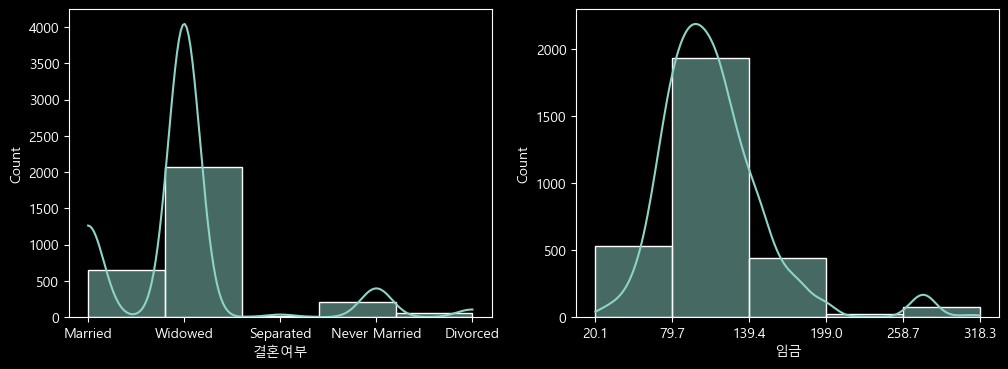

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sb.histplot(data=df3, x="결혼여부", bins=5, ax=ax1, kde=True)
sb.histplot(data=df3, x="임금", bins=5, ax=ax2, kde=True)
ax1.set_xticks(bins1)
ax1.set_xticklabels(결혼)
ax2.set_xticks(bins2)
ax2.set_xticklabels(bins2)
plt.show()
plt.close()

In [ ]:
# 정답 
vcount = cdf['maritl'].value_counts().sort_index()
vcount.index

In [ ]:
fig, ax = plt.subplots(len(vcount.index), 1, figsize=(12, 25))

fig.subplots_adjust(hspace=0.5)

for i, v in enumerate(vcount.index):
    mdf = cdf.query("maritl == @v")
    hist, bins = np.histogram(mdf['wage'], bins=10)
    bins = np.round(bins, 1)
    sb.histplot(data=mdf, x='wage', bins=10, ax=ax[i])
    ax[i].set_title('maritl == %d' % v)
    ax[i].set_xticks(bins)
    ax[i].set_xticklabels(bins, rotation=30)

plt.show()
plt.close()

6. 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

In [16]:
교육1 = list(set(list(df['education'])))
교육2 = []
for i in range(len(교육1)) :
    교육2.append(교육1[i][3:])
교육2

['HS Grad', 'Advanced Degree', 'Some College', '< HS Grad', 'College Grad']

In [17]:
bins1 = np.array([1,2,3,4,5])
bins1

array([1, 2, 3, 4, 5])

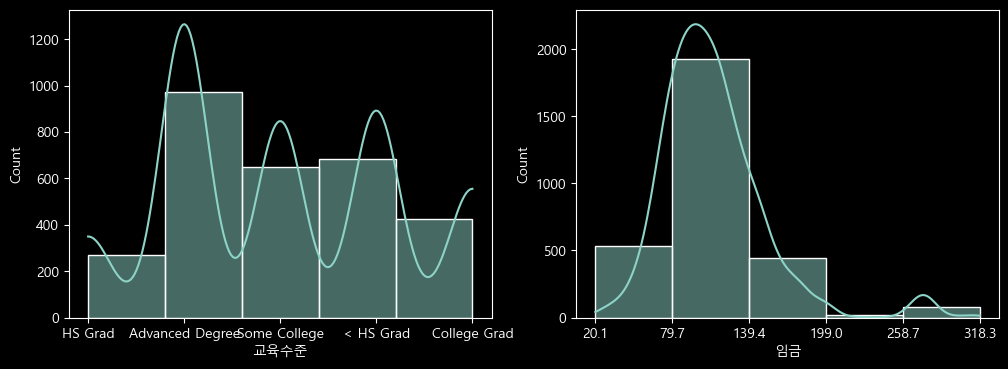

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sb.histplot(data=df3, x="교육수준", bins=5, ax=ax1, kde=True)
sb.histplot(data=df3, x="임금", bins=5, ax=ax2, kde=True)
ax1.set_xticks(bins1)
ax1.set_xticklabels(교육2)
ax2.set_xticks(bins2)
ax2.set_xticklabels(bins2)
plt.show()
plt.close()

In [ ]:
# 정답 

vcount = cdf['education'].value_counts().sort_index()

fig, ax = plt.subplots(len(vcount.index), 1, figsize=(12, 25))

fig.subplots_adjust(hspace=0.5)

for i, v in enumerate(vcount.index):
    mdf = cdf.query("education == @v")
    hist, bins = np.histogram(mdf['wage'], bins=10)
    bins = np.round(bins, 1)
    sb.histplot(data=mdf, x='wage', bins=10, ax=ax[i])
    ax[i].set_title('education == %d' % v)
    ax[i].set_xticks(bins)
    ax[i].set_xticklabels(bins, rotation=30)

plt.show()
plt.close()

7. 직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오. = 교차표 활용.... 

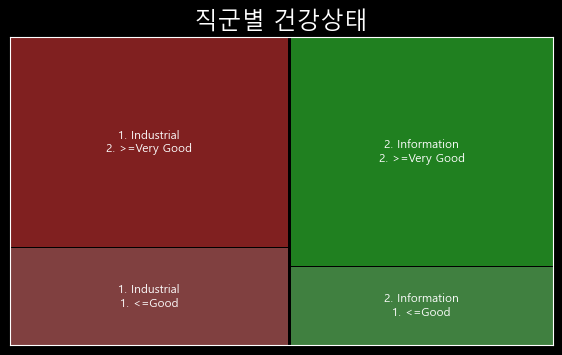

In [19]:
mosaic(df,['jobclass','health'], axes_label=False)
plt.title('직군별 건강상태',fontsize=17)
plt.show()
plt.close()

산업 직군 종사자는 정보 직군 종사자보다 건강 상태가 좋지 않다. 역시 화이트 칼라.

8. 교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.


In [20]:
df3

,탄생년도,나이,결혼여부,근로자의인종,교육수준,지역,직군,건강상태,건강보험가입여부,임금(로그),임금
0,2006,18,1.0,1.0,1.0,2,1,1,2,4.318063,75.043154
1,2004,24,1.0,1.0,4.0,2,2,2,2,4.255273,70.476020
2,2003,45,2.0,1.0,3.0,2,1,1,1,4.875061,130.982177
3,2003,43,2.0,3.0,4.0,2,2,2,1,5.041393,154.685293
4,2005,50,4.0,1.0,2.0,2,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2.0,1.0,3.0,2,1,2,1,5.041393,154.685293
2996,2007,30,2.0,1.0,2.0,2,1,2,2,4.602060,99.689464
2997,2005,27,2.0,2.0,1.0,2,1,1,2,4.193125,66.229408
2998,2005,27,1.0,1.0,3.0,2,1,2,1,4.477121,87.981033


In [21]:
인종1 = list(set(list(df['race'])))
인종 = []
for i in range(len(인종1)) :
    인종.append(인종1[i][3:])
인종

['White', 'Black', 'Other', 'Asian']

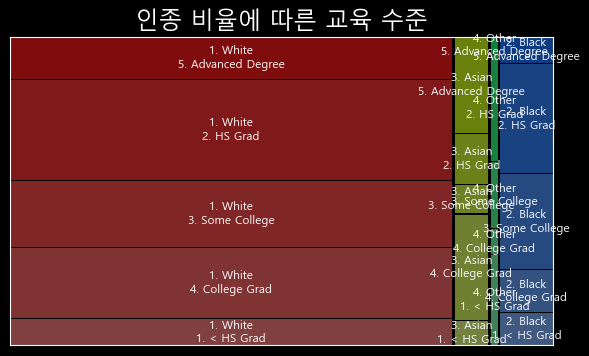

In [22]:
mosaic(df,['race','education'], axes_label=False)
plt.title('인종 비율에 따른 교육 수준',fontsize=17)
plt.show()
plt.close()